In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import ResNet50, VGG16
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 5s 0us/step


In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3) (50000, 1) (10000, 1)


In [ ]:
resnet_layer = ResNet50(weights='imagenet',include_top=False,input_shape=(32,32,3))
# weights='imagenet': imagenet을 통해 학습한 결과의 parameter를 사용하겠다는 의미
# include_top=False: 특징 추출 다음 단계(Dense layer)는 직접 학습하겠다는 의미
# input_shape=(32,32,3)
resnet_layer.trainable = False
# resnet_layer.trainable = True: resnet 구조만 가져오고 weights를 학습하겠다는 의미
# resnet_layer.trainable = False: 미리 학습된 resnet의 weight를 사용하겠다는 의미

94765736/94765736 [==============================] - 2s 0us/step


In [ ]:
CNN_model = Sequential([
    resnet_layer,
    # Flatten
    Flatten(),
    # Dense
    Dense(256,activation='relu'),
    Dense(10,activation='softmax')
])

In [ ]:
CNN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1, 1, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 256)               524544    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 24,114,826
Trainable params: 527,114
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
CNN_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

In [ ]:
ep = 20
batch = 512
val_ratio = 0.2

cifar10_result = CNN_model.fit(X_train, y_train,
                               epochs=ep,
                               batch_size=batch,
                               validation_split=val_ratio)

Epoch 1/20
79/79 [==============================] - 262s 3s/step - loss: 1.5693 - acc: 0.4943 - val_loss: 1.2225 - val_acc: 0.5748
Epoch 2/20
79/79 [==============================] - 215s 3s/step - loss: 1.0737 - acc: 0.6226 - val_loss: 1.1585 - val_acc: 0.5977
Epoch 3/20
79/79 [==============================] - 255s 3s/step - loss: 0.9330 - acc: 0.6720 - val_loss: 1.1365 - val_acc: 0.6133
Epoch 4/20
79/79 [==============================] - 219s 3s/step - loss: 0.8288 - acc: 0.7100 - val_loss: 1.1459 - val_acc: 0.6169
Epoch 5/20
79/79 [==============================] - 254s 3s/step - loss: 0.7389 - acc: 0.7423 - val_loss: 1.1412 - val_acc: 0.6174
Epoch 6/20
79/79 [==============================] - 254s 3s/step - loss: 0.6534 - acc: 0.7764 - val_loss: 1.1518 - val_acc: 0.6226
Epoch 7/20
79/79 [==============================] - 254s 3s/step - loss: 0.5773 - acc: 0.8062 - val_loss: 1.1793 - val_acc: 0.6198
Epoch 8/20
79/79 [==============================] - 254s 3s/step - loss: 0.5068 - a

In [ ]:
# test data 성능 확인
CNN_model.evaluate(X_test,y_test)

313/313 [==============================] - 51s 164ms/step - loss: 1.8336 - acc: 0.6058


[1.833601951599121, 0.6057999730110168]

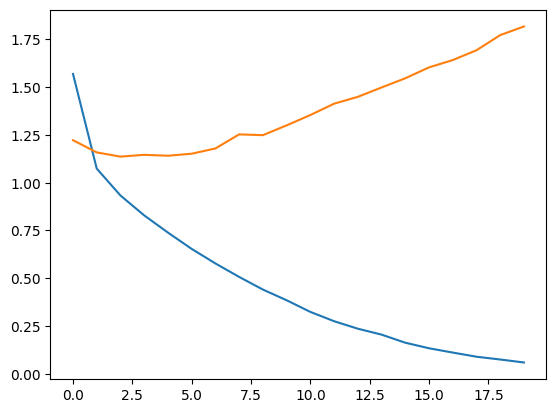

In [ ]:
plt.plot(cifar10_result.history['loss'])
plt.plot(cifar10_result.history['val_loss'])

In [ ]:
# X_test의 predict 후 예측 결과와 y_test 비교하기
# 서로 다르게 판단하 image의 index를 찾고
# 잘못 분류된 데이터 image와 예측 및 실제값 출력
pred_proba = CNN_model.predict(X_test)
pred = np.argmax(pred_proba,axis=1)

313/313 [==============================] - 53s 164ms/step


In [ ]:
y_test.ravel()

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [ ]:
# y_test는 2d array, pred는 1d array이므로
# y_test와 pred를 동일한 형태로 변경함
# y_test를 1d array로 변경
# ndarray.ravel(): 1d array로 변환
wrong_ind = np.argwhere(y_test.ravel() != pred)

In [ ]:
wrong_ind

array([[   3],
       [   6],
       [   7],
       ...,
       [9996],
       [9998],
       [9999]])

[0]
8


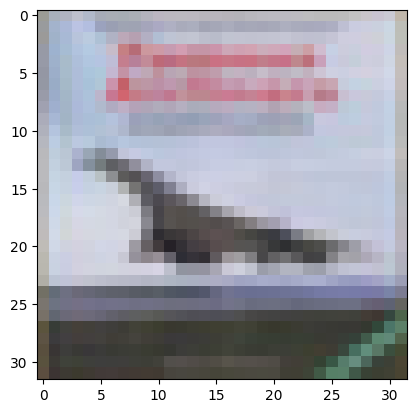

In [ ]:
plt.imshow(X_test[3])
print(y_test[3])
print(pred[3])